# Initialization

In [1]:
%pip install gensim
%pip install numpy
%pip install scipy==1.12 #erreur avec les versions récentes de scipy qui ne comportent plus certaines fonctions appelées par gensim.models 
%pip install nltk
%pip install matplotlib
%pip install transformers scikit-learn torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 32.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scipy-1.14.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.14.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.2 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=24071653 sha256=4d5b112f7ae0cdf48353570deb18af224cd15cd2bf23c563f5d64cecc021dd07
  Stored in directory: /home/onyxia/.cache/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4

In [39]:
import gensim
import math
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
import nltk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
nltk.download('punkt')  


[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [16]:
def euclidean_distance(vector1, vector2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(vector1, vector2)))

def cosine_similarity(vector1, vector2):
    dot_product = sum(a * b for a, b in zip(vector1, vector2))
    magnitude1 = math.sqrt(sum(a ** 2 for a in vector1))
    magnitude2 = math.sqrt(sum(b ** 2 for b in vector2))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0.0  # Pour éviter la division par zéro
    return dot_product / (magnitude1 * magnitude2)

# Clustering sans réduction de dimension 


In [55]:
vocab = {
    "Fruits": ["apple", "banana", "orange", "grape", "mango"],
    "Animals": ["dog", "cat", "elephant", "tiger", "lion"],
    "Transport": ["car", "bicycle", "airplane", "train", "boat"]
}


words = [word for category in vocab.values() for word in category]
vectors = np.array([model[word] for word in words])
#print(vectors)

kmeans = KMeans(n_clusters=3, random_state=0) 
cluster_labels = kmeans.fit_predict(vectors)

print(cluster_labels)

[2 2 2 2 2 1 0 0 0 0 1 1 1 1 1]


# Réduction à 2 dimensions.


['apple', 'banana', 'orange', 'grape', 'mango', 'dog', 'cat', 'elephant', 'tiger', 'lion', 'car', 'bicycle', 'airplane', 'train', 'boat']
{'apple': array([-1.7714484 , -0.49598268], dtype=float32), 'banana': array([-1.4647027 , -0.46271217], dtype=float32), 'orange': array([-0.9672342 ,  0.02329792], dtype=float32), 'grape': array([-2.114062  , -0.41525877], dtype=float32), 'mango': array([-2.0365157 , -0.49958318], dtype=float32), 'dog': array([ 1.1540847 , -0.38541654], dtype=float32), 'cat': array([ 1.1230016 , -0.87229854], dtype=float32), 'elephant': array([ 1.1305835, -1.5545187], dtype=float32), 'tiger': array([ 1.4951004, -1.4630895], dtype=float32), 'lion': array([ 1.1661509, -1.2274776], dtype=float32), 'car': array([0.434753, 1.452348], dtype=float32), 'bicycle': array([0.4495822, 1.3132005], dtype=float32), 'airplane': array([0.2599642, 1.5347892], dtype=float32), 'train': array([0.5558949, 1.1902968], dtype=float32), 'boat': array([0.58484864, 1.8624043 ], dtype=float32)}


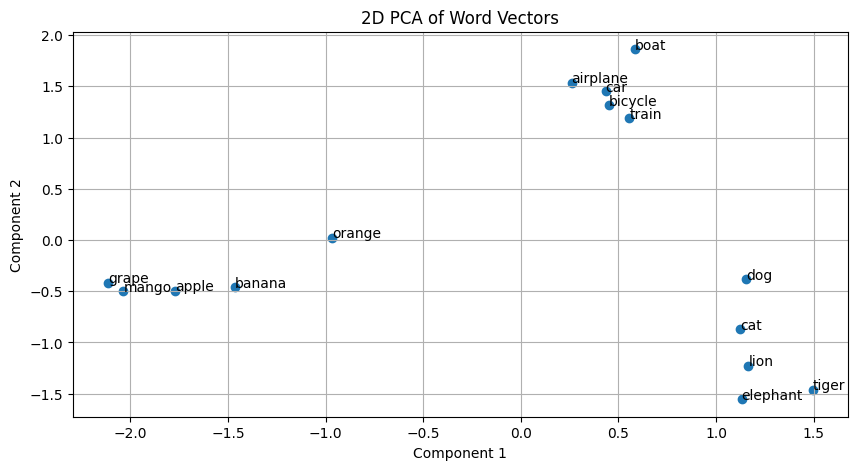

In [21]:
vocab = {
    "Fruits": ["apple", "banana", "orange", "grape", "mango"],
    "Animals": ["dog", "cat", "elephant", "tiger", "lion"],
    "Transport": ["car", "bicycle", "airplane", "train", "boat"]
}


words = [word for category in vocab.values() for word in category]

print(words)

vectors = np.array([model[word] for word in words])



# Réduction de dimension à l'aide de PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)


# Dictionnaire des vecteurs après PCA
vectors_after_pca = {word: vectors_pca[i] for i, word in enumerate(words)}



print(vectors_after_pca)
print(vectors_after_pca["apple"])

# Visualisation en 2D
plt.figure(figsize=(10, 5))
plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (vectors_pca[i, 0], vectors_pca[i, 1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D PCA of Word Vectors')
plt.grid(True)
plt.show()

In [38]:
print("distance euclidienne entre apple et banana avant acp : ", euclidean_distance(model["apple"],model["banana"]))
print("distance euclidienne entre apple et banana après acp : ", euclidean_distance(vectors_after_pca["apple"],vectors_after_pca["banana"]))
print("cosine similarity entre apple et banana avant acp : ", cosine_similarity(model["apple"],model["banana"]))
print("cosine similarity entre apple et banana après acp : ", cosine_similarity(vectors_after_pca["apple"],vectors_after_pca["banana"]))


print('\n')
print("distance euclidienne entre dog et boat avant acp : ", euclidean_distance(model["dog"], model["boat"]))
print("distance euclidienne entre dog et boat après acp : ", euclidean_distance(vectors_after_pca["dog"], vectors_after_pca["boat"]))
print("cosine similarity entre dog et boat avant acp : ", cosine_similarity(model["dog"], model["boat"]))
print("cosine similarity entre dog et boat après acp : ", cosine_similarity(vectors_after_pca["dog"], vectors_after_pca["boat"]))

print('\n')

print("distance euclidienne entre car et bicycle avant acp : ", euclidean_distance(model["car"], model["bicycle"]))
print("distance euclidienne entre car et bicycle après acp : ", euclidean_distance(vectors_after_pca["car"], vectors_after_pca["bicycle"]))
print("cosine similarity entre car et bicycle avant acp : ", cosine_similarity(model["car"], model["bicycle"]))
print("cosine similarity entre car et bicycle après acp : ", cosine_similarity(vectors_after_pca["car"], vectors_after_pca["bicycle"]))

print("\n")

print("distance euclidienne entre dog et orange avant acp : ", euclidean_distance(model["dog"], model["orange"]))
print("distance euclidienne entre dog et orange après acp : ", euclidean_distance(vectors_after_pca["dog"], vectors_after_pca["orange"]))
print("cosine similarity entre dog et orange avant acp : ", cosine_similarity(model["dog"], model["orange"]))
print("cosine similarity entre dog et orange après acp : ", cosine_similarity(vectors_after_pca["dog"], vectors_after_pca["orange"]))

print("\n")

print("distance euclidienne entre cat et cat avant acp : ", euclidean_distance(model["cat"], model["cat"]))
print("distance euclidienne entre cat et cat après acp : ", euclidean_distance(vectors_after_pca["cat"], vectors_after_pca["cat"]))
print("cosine similarity entre cat et cat avant acp : ", cosine_similarity(model["cat"], model["cat"]))
print("cosine similarity entre cat et cat après acp : ", cosine_similarity(vectors_after_pca["cat"], vectors_after_pca["cat"]))

distance euclidienne entre apple et banana avant acp :  2.9922431037694026
distance euclidienne entre apple et banana après acp :  0.308544679922608
cosine similarity entre apple et banana avant acp :  0.5318406129968402
cosine similarity entre apple et banana après acp :  0.9994558662516282


distance euclidienne entre dog et boat avant acp :  3.8055216454550305
distance euclidienne entre dog et boat après acp :  2.318777320460988
cosine similarity entre dog et boat avant acp :  0.22969708468824604
cosine similarity entre dog et boat après acp :  -0.018035182691556354


distance euclidienne entre car et bicycle avant acp :  2.7047768482218673
distance euclidienne entre car et bicycle après acp :  0.13993547503911588
cosine similarity entre car et bicycle avant acp :  0.5364484561983549
cosine similarity entre car et bicycle après acp :  0.999239852545396


distance euclidienne entre dog et orange avant acp :  3.8789927690548014
distance euclidienne entre dog et orange après acp :  2.1

## Interprétation pour cosine similarity : 

### Proche de 1 : Les vecteurs sont très similaires en direction. Par exemple, dans le traitement du langage naturel, deux documents avec une similarité cosinus proche de 1 ont des contenus très similaires. 

### Proche de 0 : Les vecteurs n'ont pas de similarité directionnelle. Cela peut signifier que les documents ou éléments comparés n'ont pas de caractéristiques communes. 

### Proche de -1 : Les vecteurs sont opposés en direction.

## Clustering K means 

[2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


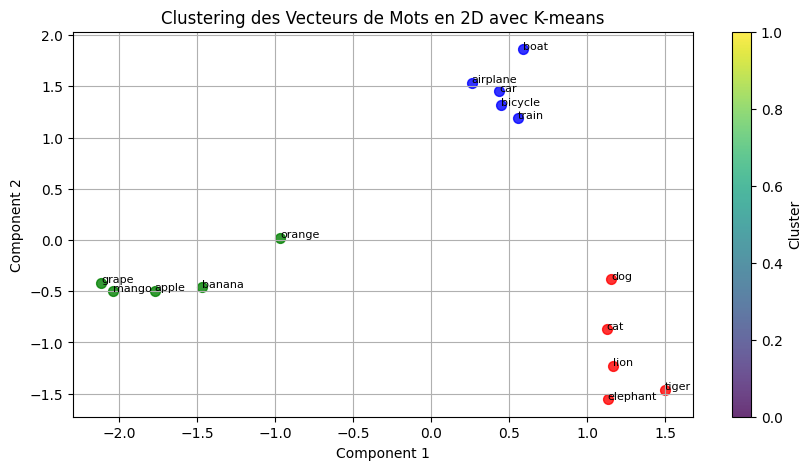

In [51]:
kmeans = KMeans(n_clusters=3, random_state=0) 
cluster_labels = kmeans.fit_predict(vectors_pca)

print(cluster_labels)

color_cluster=[]
for i in cluster_labels : 
    if i ==2 :
        color_cluster.append("green")
    if i ==1 :
        color_cluster.append("blue")
    if i ==0 :
        color_cluster.append("red")

# Visualisation en 2D
plt.figure(figsize=(10, 5))

# Tracer les points avec couleurs selon les clusters
for i in range(len(words)):
    plt.scatter(vectors_pca[i, 0], vectors_pca[i, 1], c=color_cluster[i], s=50, alpha=0.8)

# Annoter les points avec les mots
for i, word in enumerate(words):
    plt.annotate(word, (vectors_pca[i, 0], vectors_pca[i, 1]), fontsize=8)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering des Vecteurs de Mots en 2D avec K-means')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# Réduction à 3 dimensions

['apple', 'banana', 'orange', 'grape', 'mango', 'dog', 'cat', 'elephant', 'tiger', 'lion', 'car', 'bicycle', 'airplane', 'train', 'boat']
{'apple': array([-1.7714484 , -0.49598268,  0.39228398], dtype=float32), 'banana': array([-1.4647027 , -0.46271217,  0.01049725], dtype=float32), 'orange': array([-0.9672342 ,  0.02329792,  0.18633278], dtype=float32), 'grape': array([-2.114062  , -0.41525877,  0.11470293], dtype=float32), 'mango': array([-2.0365157 , -0.49958318, -0.47378525], dtype=float32), 'dog': array([ 1.1540847 , -0.38541654,  1.6363567 ], dtype=float32), 'cat': array([ 1.1230016 , -0.87229854,  1.585814  ], dtype=float32), 'elephant': array([ 1.1305835, -1.5545187, -1.138445 ], dtype=float32), 'tiger': array([ 1.4951004, -1.4630895, -0.807855 ], dtype=float32), 'lion': array([ 1.1661509, -1.2274776, -0.4166061], dtype=float32), 'car': array([0.434753  , 1.452348  , 0.17260335], dtype=float32), 'bicycle': array([0.4495822 , 1.3132005 , 0.11807834], dtype=float32), 'airplane': 

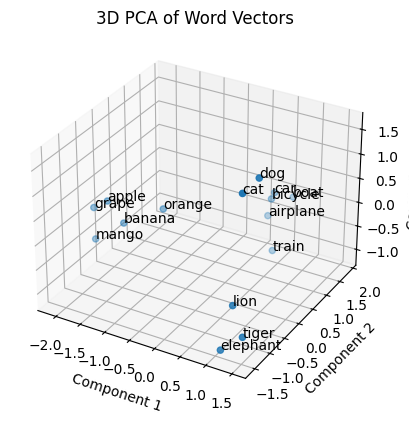

In [56]:
vocab = {
    "Fruits": ["apple", "banana", "orange", "grape", "mango"],
    "Animals": ["dog", "cat", "elephant", "tiger", "lion"],
    "Transport": ["car", "bicycle", "airplane", "train", "boat"]
}


words = [word for category in vocab.values() for word in category]

print(words)

vectors = np.array([model[word] for word in words])



# Réduction de dimension à l'aide de PCA
pca = PCA(n_components=3)
vectors_pca = pca.fit_transform(vectors)


# Dictionnaire des vecteurs après PCA
vectors_after_pca = {word: vectors_pca[i] for i, word in enumerate(words)}



print(vectors_after_pca)
print(vectors_after_pca["apple"])

# Visualisation en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vectors_pca[:, 0], vectors_pca[:, 1], vectors_pca[:, 2])

for i, word in enumerate(words):
    ax.text(vectors_pca[i, 0], vectors_pca[i, 1], vectors_pca[i, 2], word)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('3D PCA of Word Vectors')
plt.show()

In [57]:
print("distance euclidienne entre apple et banana avant acp : ", euclidean_distance(model["apple"],model["banana"]))
print("distance euclidienne entre apple et banana après acp : ", euclidean_distance(vectors_after_pca["apple"],vectors_after_pca["banana"]))
print("cosine similarity entre apple et banana avant acp : ", cosine_similarity(model["apple"],model["banana"]))
print("cosine similarity entre apple et banana après acp : ", cosine_similarity(vectors_after_pca["apple"],vectors_after_pca["banana"]))


print('\n')
print("distance euclidienne entre dog et boat avant acp : ", euclidean_distance(model["dog"], model["boat"]))
print("distance euclidienne entre dog et boat après acp : ", euclidean_distance(vectors_after_pca["dog"], vectors_after_pca["boat"]))
print("cosine similarity entre dog et boat avant acp : ", cosine_similarity(model["dog"], model["boat"]))
print("cosine similarity entre dog et boat après acp : ", cosine_similarity(vectors_after_pca["dog"], vectors_after_pca["boat"]))

print('\n')

print("distance euclidienne entre car et bicycle avant acp : ", euclidean_distance(model["car"], model["bicycle"]))
print("distance euclidienne entre car et bicycle après acp : ", euclidean_distance(vectors_after_pca["car"], vectors_after_pca["bicycle"]))
print("cosine similarity entre car et bicycle avant acp : ", cosine_similarity(model["car"], model["bicycle"]))
print("cosine similarity entre car et bicycle après acp : ", cosine_similarity(vectors_after_pca["car"], vectors_after_pca["bicycle"]))

print("\n")

print("distance euclidienne entre dog et orange avant acp : ", euclidean_distance(model["dog"], model["orange"]))
print("distance euclidienne entre dog et orange après acp : ", euclidean_distance(vectors_after_pca["dog"], vectors_after_pca["orange"]))
print("cosine similarity entre dog et orange avant acp : ", cosine_similarity(model["dog"], model["orange"]))
print("cosine similarity entre dog et orange après acp : ", cosine_similarity(vectors_after_pca["dog"], vectors_after_pca["orange"]))

print("\n")

print("distance euclidienne entre cat et cat avant acp : ", euclidean_distance(model["cat"], model["cat"]))
print("distance euclidienne entre cat et cat après acp : ", euclidean_distance(vectors_after_pca["cat"], vectors_after_pca["cat"]))
print("cosine similarity entre cat et cat avant acp : ", cosine_similarity(model["cat"], model["cat"]))
print("cosine similarity entre cat et cat après acp : ", cosine_similarity(vectors_after_pca["cat"], vectors_after_pca["cat"]))

distance euclidienne entre apple et banana avant acp :  2.9922431037694026
distance euclidienne entre apple et banana après acp :  0.4908777135544171
cosine similarity entre apple et banana avant acp :  0.5318406129968402
cosine similarity entre apple et banana après acp :  0.9788802395520485


distance euclidienne entre dog et boat avant acp :  3.8055216454550305
distance euclidienne entre dog et boat après acp :  2.894867719867179
cosine similarity entre dog et boat avant acp :  0.22969708468824604
cosine similarity entre dog et boat après acp :  -0.05045694873103146


distance euclidienne entre car et bicycle avant acp :  2.7047768482218673
distance euclidienne entre car et bicycle après acp :  0.15018293755879716
cosine similarity entre car et bicycle avant acp :  0.5364484561983549
cosine similarity entre car et bicycle après acp :  0.9988413595951522


distance euclidienne entre dog et orange avant acp :  3.8789927690548014
distance euclidienne entre dog et orange après acp :  2.

In [67]:
kmeans = KMeans(n_clusters=3, random_state=0) 
cluster_labels = kmeans.fit_predict(vectors_pca)

print("clustering :",cluster_labels)

clustering : [2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


# Réduction à n dimensions 

In [66]:
n=4

In [65]:
vocab = {
    "Fruits": ["apple", "banana", "orange", "grape", "mango"],
    "Animals": ["dog", "cat", "elephant", "tiger", "lion"],
    "Transport": ["car", "bicycle", "airplane", "train", "boat"]
}


words = [word for category in vocab.values() for word in category]

print("les mots sont : ",words)

vectors = np.array([model[word] for word in words])



# Réduction de dimension à l'aide de PCA
pca = PCA(n_components=n)
vectors_pca = pca.fit_transform(vectors)


# Dictionnaire des vecteurs après PCA
vectors_after_pca = {word: vectors_pca[i] for i, word in enumerate(words)}



# print(vectors_after_pca)
print("le vecteur d'apple devient après réduction :", vectors_after_pca["apple"])


print("distance euclidienne entre apple et banana avant acp : ", euclidean_distance(model["apple"],model["banana"]))
print("distance euclidienne entre apple et banana après acp : ", euclidean_distance(vectors_after_pca["apple"],vectors_after_pca["banana"]))
print("cosine similarity entre apple et banana avant acp : ", cosine_similarity(model["apple"],model["banana"]))
print("cosine similarity entre apple et banana après acp : ", cosine_similarity(vectors_after_pca["apple"],vectors_after_pca["banana"]))


print('\n')
print("distance euclidienne entre dog et boat avant acp : ", euclidean_distance(model["dog"], model["boat"]))
print("distance euclidienne entre dog et boat après acp : ", euclidean_distance(vectors_after_pca["dog"], vectors_after_pca["boat"]))
print("cosine similarity entre dog et boat avant acp : ", cosine_similarity(model["dog"], model["boat"]))
print("cosine similarity entre dog et boat après acp : ", cosine_similarity(vectors_after_pca["dog"], vectors_after_pca["boat"]))

print('\n')

print("distance euclidienne entre car et bicycle avant acp : ", euclidean_distance(model["car"], model["bicycle"]))
print("distance euclidienne entre car et bicycle après acp : ", euclidean_distance(vectors_after_pca["car"], vectors_after_pca["bicycle"]))
print("cosine similarity entre car et bicycle avant acp : ", cosine_similarity(model["car"], model["bicycle"]))
print("cosine similarity entre car et bicycle après acp : ", cosine_similarity(vectors_after_pca["car"], vectors_after_pca["bicycle"]))

print("\n")

print("distance euclidienne entre dog et orange avant acp : ", euclidean_distance(model["dog"], model["orange"]))
print("distance euclidienne entre dog et orange après acp : ", euclidean_distance(vectors_after_pca["dog"], vectors_after_pca["orange"]))
print("cosine similarity entre dog et orange avant acp : ", cosine_similarity(model["dog"], model["orange"]))
print("cosine similarity entre dog et orange après acp : ", cosine_similarity(vectors_after_pca["dog"], vectors_after_pca["orange"]))

print("\n")

print("distance euclidienne entre cat et cat avant acp : ", euclidean_distance(model["cat"], model["cat"]))
print("distance euclidienne entre cat et cat après acp : ", euclidean_distance(vectors_after_pca["cat"], vectors_after_pca["cat"]))
print("cosine similarity entre cat et cat avant acp : ", cosine_similarity(model["cat"], model["cat"]))
print("cosine similarity entre cat et cat après acp : ", cosine_similarity(vectors_after_pca["cat"], vectors_after_pca["cat"]))


kmeans = KMeans(n_clusters=3, random_state=0) 
cluster_labels = kmeans.fit_predict(vectors_pca)

print('Le clustering de la versions réduite :', cluster_labels)

les mots sont :  ['apple', 'banana', 'orange', 'grape', 'mango', 'dog', 'cat', 'elephant', 'tiger', 'lion', 'car', 'bicycle', 'airplane', 'train', 'boat']
le vecteur d'apple devient après réduction : [-1.7714484  -0.49598268  0.39228398  0.00901997]
distance euclidienne entre apple et banana avant acp :  2.9922431037694026
distance euclidienne entre apple et banana après acp :  0.5365747406417466
cosine similarity entre apple et banana avant acp :  0.5318406129968402
cosine similarity entre apple et banana après acp :  0.9691675437080742


distance euclidienne entre dog et boat avant acp :  3.8055216454550305
distance euclidienne entre dog et boat après acp :  3.2928524446889202
cosine similarity entre dog et boat avant acp :  0.22969708468824604
cosine similarity entre dog et boat après acp :  -0.10015666947906741


distance euclidienne entre car et bicycle avant acp :  2.7047768482218673
distance euclidienne entre car et bicycle après acp :  0.9312066193083781
cosine similarity entre